<a href="https://colab.research.google.com/github/Jarvis017/Connect-4-Win-Prediction-with-Decision-Tree/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
from google.colab import drive
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from distutils.version import LooseVersion
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Preprocessing

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open("/content/drive/MyDrive/Intelligent Systems/connect-4.data", 'rb') as f:
    data = pd.read_csv(f)

## Rename Columns

In [ ]:
data.columns = [f'Pos{i+1}' for i in range(len(data.columns))]
data.rename(columns={"Pos43": "win"}, inplace=True)

In [ ]:
data

,Pos1,Pos2,Pos3,Pos4,Pos5,Pos6,Pos7,Pos8,Pos9,Pos10,...,Pos34,Pos35,Pos36,Pos37,Pos38,Pos39,Pos40,Pos41,Pos42,win
0,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
1,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,win
2,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
3,o,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
4,b,b,b,b,b,b,b,b,b,b,...,b,b,b,o,b,b,b,b,b,win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67551,x,x,b,b,b,b,o,x,o,b,...,b,b,b,o,o,x,b,b,b,loss
67552,x,x,b,b,b,b,o,b,b,b,...,b,b,b,o,x,o,o,x,b,draw
67553,x,x,b,b,b,b,o,o,b,b,...,b,b,b,o,x,x,o,b,b,loss
67554,x,o,b,b,b,b,o,b,b,b,...,b,b,b,o,x,o,x,x,b,draw


## Convert Strings to Numbers

In [ ]:
data['win'] = data['win'].replace("win",1)
data['win'] = data['win'].replace("loss",-1)
data['win'] = data['win'].replace("draw",0)

In [ ]:
data = data.replace('x',1)
data = data.replace('o',-1)
data = data.replace('b',0)
data

,Pos1,Pos2,Pos3,Pos4,Pos5,Pos6,Pos7,Pos8,Pos9,Pos10,...,Pos34,Pos35,Pos36,Pos37,Pos38,Pos39,Pos40,Pos41,Pos42,win
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67551,1,1,0,0,0,0,-1,1,-1,0,...,0,0,0,-1,-1,1,0,0,0,-1
67552,1,1,0,0,0,0,-1,0,0,0,...,0,0,0,-1,1,-1,-1,1,0,0
67553,1,1,0,0,0,0,-1,-1,0,0,...,0,0,0,-1,1,1,-1,0,0,-1
67554,1,-1,0,0,0,0,-1,0,0,0,...,0,0,0,-1,1,-1,1,1,0,0


## Histogram of Features

In [ ]:
data.iloc[1].T

Pos1     0
Pos2     0
Pos3     0
Pos4     0
Pos5     0
Pos6     0
Pos7    -1
Pos8     0
Pos9     0
Pos10    0
Pos11    0
Pos12    0
Pos13    1
Pos14    0
Pos15    0
Pos16    0
Pos17    0
Pos18    0
Pos19    1
Pos20   -1
Pos21    1
Pos22   -1
Pos23    1
Pos24   -1
Pos25    0
Pos26    0
Pos27    0
Pos28    0
Pos29    0
Pos30    0
Pos31    0
Pos32    0
Pos33    0
Pos34    0
Pos35    0
Pos36    0
Pos37    0
Pos38    0
Pos39    0
Pos40    0
Pos41    0
Pos42    0
win      1
Name: 1, dtype: int64

Axes(0.125,0.11;0.775x0.77)


<ipython-input-9-1fe6f8afaa3e>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax)


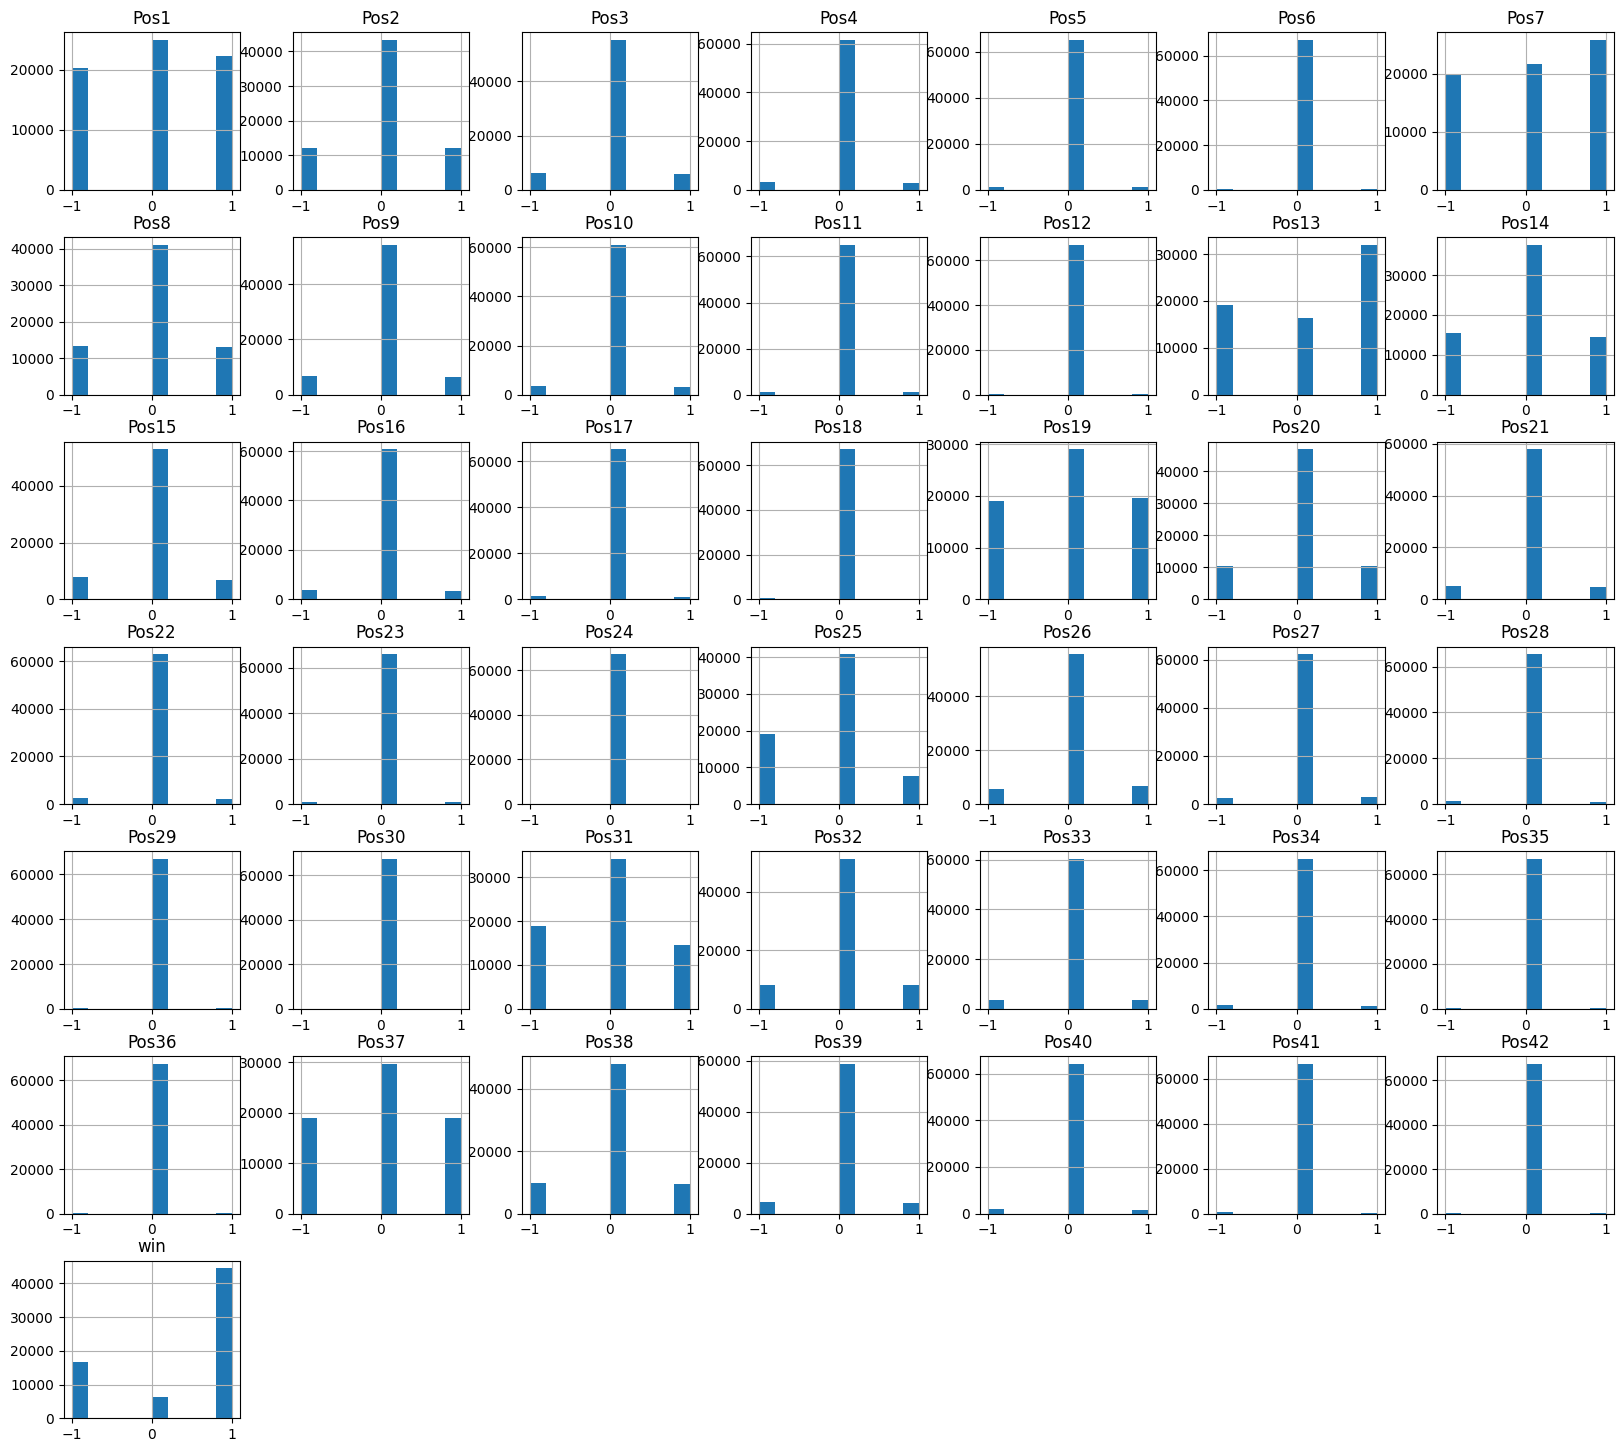

In [ ]:
fig = plt.figure(figsize = (20,18))
ax = fig.gca()
print(ax)
data.hist(ax=ax)
plt.show()

In [ ]:
X = data.drop('win',axis = 1)
y = data['win']

## Usefull Functins

## Train-Test Split

In [ ]:
def TrainTestSplit(portion,X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=portion,random_state=42)
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = TrainTestSplit(0.2,X,y)

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

### Fit the model

In [ ]:
def Fit(model, X, y):
  model.fit(X,y)
  return model

### Evaluation

In [ ]:
def Eval(model, X,y):
  y_pred = model.predict(X)
  return accuracy_score(y,y_pred)

### Tree schema

In [ ]:
def Plot(tree_model):
  fig = plt.figure(figsize = (22,18))
  ax = fig.gca()
  feature_names = data.columns[:-1]
  tree.plot_tree(tree_model,
               feature_names=feature_names,
               filled=True,fontsize = 5)

## Plotting accuracy

In [ ]:
def Plotting(accuracies, depth):
  """
  Plot the Accuracies
  """

  train = [accuracies[i][0] for i in range(len(accuracies))]
  test = [accuracies[i][1] for i in range(len(accuracies))]
  #plt.plot(depth,train,'g',label='Train Accuracy')
  #plt.plot(depth,test,'b',label='Test Accuracy')
  plt.scatter(depth, train, color = 'r', label = 'train')
  plt.scatter(depth, test, color = 'g', label = 'test')
  train_num = [plt.annotate(str(i+1),(depth[i],train[i])) for i in range(len(depth))]
  test_num = [plt.annotate(str(i+1),(depth[i],test[i])) for i in range(len(depth))]
  plt.title('Decision Tree Accuracy')
  plt.xlabel('Depth')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

## Run the model

In [ ]:
def Run(tree_model,X_train, y_train,X_test, y_test, plotting = False):
  """
  Fit,evaluate and plot the final tree
  """
  tree_model = Fit(tree_model, X_train, y_train)
  train_accuracy = Eval(tree_model, X_train, y_train)
  test_accuracy = Eval(tree_model, X_test, y_test)
  if plotting:
    Plot(tree_model)
  return train_accuracy, test_accuracy

## Print Result

In [ ]:
def Result(train_accuracy, test_accuracy, depth):
  print(f'Train Accuracy is {train_accuracy} and test Accuracy is {test_accuracy}.'
                                                                                )
  print('Depth of tree is',depth)

# Models

## Decision Tree

In [ ]:
def DecisionTree(criterion, max_depth = None):
  tree_model = DecisionTreeClassifier(criterion=criterion,
                                    max_depth=max_depth,
                                    random_state=1)
  return tree_model

In [ ]:
model_1 = RandomForestClassifier()
model_1.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model_1.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8244523386619301

In [ ]:
tree_model = DecisionTreeClassifier(criterion='entropy',
                                    max_depth=20,
                                    random_state=1)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7620633510953226

In [ ]:
tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=20,
                                    random_state=1)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_train)
accuracy_score(y_train,y_pred)

0.9439900821552809

In [ ]:
tree_model = DecisionTree('gini')
tree_model = Run(tree_model,X_train, y_train,X_test, y_test)

## Training models

In [ ]:
Accuracies = []
Depths = []
criterion = 'gini'

### 1 (Gini Without Prunning)

In [ ]:
tree_model = DecisionTree(criterion)
with tf.device('/device:GPU:0'):
  train_accuracy,test_accuracy = Run(tree_model,X_train, y_train,X_test, y_test)
Accuracies.append((train_accuracy,test_accuracy))
Depths.append(tree_model.get_depth())
Result(train_accuracy, test_accuracy, tree_model.get_depth())

Train Accuracy is 1.0 and test Accuracy is 0.7678359976317347.
Depth of tree is 35


### 2 (Information Gain without Prunning)

In [ ]:
criterion = 'entropy'
tree_model = DecisionTree(criterion)

with tf.device('/device:GPU:0'):
  train_accuracy,test_accuracy = Run(tree_model,X_train, y_train,X_test, y_test)

Accuracies.append((train_accuracy,test_accuracy))
Depths.append(tree_model.get_depth())

Result(train_accuracy, test_accuracy, tree_model.get_depth())

Train Accuracy is 1.0 and test Accuracy is 0.76850207223209.
Depth of tree is 40


### 3 (Information Gain with prunnig)

In [ ]:
criterion = 'entropy'
tree_model = DecisionTree(criterion, max_depth = 18)

with tf.device('/device:GPU:0'):
  train_accuracy,test_accuracy = Run(tree_model,X_train, y_train,X_test, y_test)

Accuracies.append((train_accuracy,test_accuracy))
Depths.append(tree_model.get_depth())

Result(train_accuracy, test_accuracy, tree_model.get_depth())

Train Accuracy is 0.8813189253201096 and test Accuracy is 0.7562166962699822.
Depth of tree is 18


### 4 (Gini with Prunning)

Train Accuracy is 0.7667826215676116 and test Accuracy is 0.7407489638839551.
Depth of tree is 10


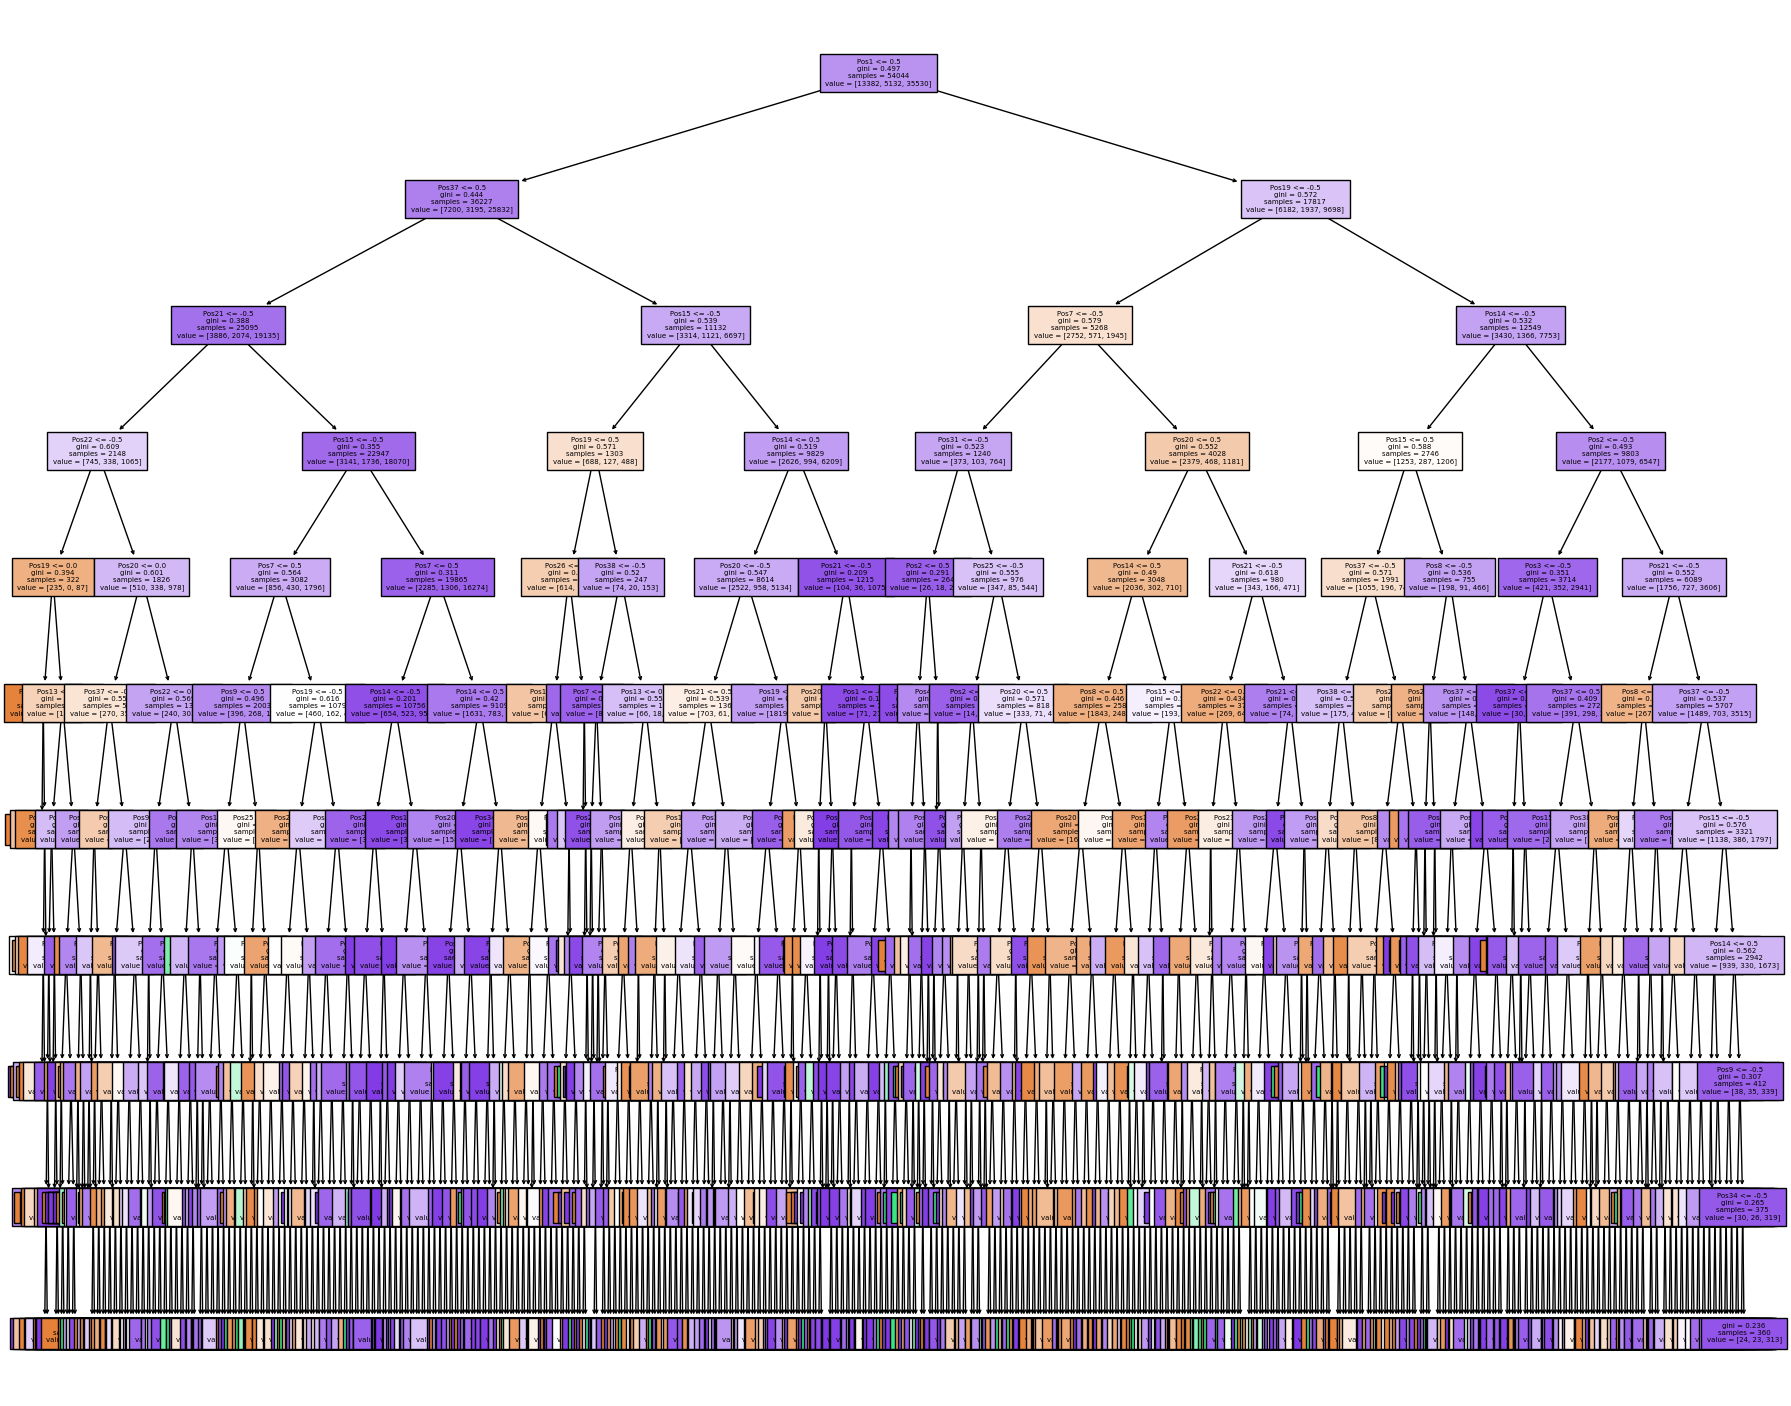

In [ ]:
criterion = 'gini'
tree_model = DecisionTree(criterion, max_depth = 10)

with tf.device('/device:GPU:0'):
  train_accuracy,test_accuracy = Run(tree_model,X_train, y_train,X_test, y_test,
                                     plotting = True)

Accuracies.append((train_accuracy,test_accuracy))
Depths.append(tree_model.get_depth())

Result(train_accuracy, test_accuracy, tree_model.get_depth())

### 5 (Gini with Prunning)

In [ ]:
criterion = 'gini'
tree_model = DecisionTree(criterion, max_depth = 25)

with tf.device('/device:GPU:0'):
  train_accuracy,test_accuracy = Run(tree_model,X_train, y_train,X_test, y_test)

Accuracies.append((train_accuracy,test_accuracy))
Depths.append(tree_model.get_depth())

Result(train_accuracy, test_accuracy, tree_model.get_depth())

Train Accuracy is 0.9869550736436977 and test Accuracy is 0.7678359976317347.
Depth of tree is 25


### 6 (change portion of Train-Test)

In [ ]:
X_train, X_test, y_train, y_test = TrainTestSplit(0.3,X,y)

criterion = 'gini'
tree_model = DecisionTree(criterion, max_depth = 23)

with tf.device('/device:GPU:0'):
  train_accuracy,test_accuracy = Run(tree_model,X_train, y_train,X_test, y_test)

Accuracies.append((train_accuracy,test_accuracy))
Depths.append(tree_model.get_depth())

Result(train_accuracy, test_accuracy, tree_model.get_depth())

Train Accuracy is 0.9802068134238406 and test Accuracy is 0.7633591552770513.
Depth of tree is 23


### 7 (change portion of Train-Test)

In [ ]:
X_train, X_test, y_train, y_test = TrainTestSplit(0.4,X,y)

criterion = 'gini'
tree_model = DecisionTree(criterion, max_depth = 22)

with tf.device('/device:GPU:0'):
  train_accuracy,test_accuracy = Run(tree_model,X_train, y_train,X_test, y_test)

Accuracies.append((train_accuracy,test_accuracy))
Depths.append(tree_model.get_depth())

Result(train_accuracy, test_accuracy, tree_model.get_depth())

Train Accuracy is 0.9635852268521945 and test Accuracy is 0.7575768789549643.
Depth of tree is 22


### 8 (Random Forest)

In [ ]:
X_train, X_test, y_train, y_test = TrainTestSplit(0.2,X,y)
tree_model = RandomForestClassifier(max_depth=30)

with tf.device('/device:GPU:0'):
  train_accuracy,test_accuracy = Run(tree_model,X_train, y_train,X_test, y_test)

Accuracies.append((train_accuracy,test_accuracy))
Depths.append(30)

Result(train_accuracy, test_accuracy, 30)

Train Accuracy is 0.9999629931167197 and test Accuracy is 0.8267465956187093.
Depth of tree is 30


In [ ]:
X_train, X_test, y_train, y_test = TrainTestSplit(0.4,X,y)

criterion = 'gini'
tree_model = DecisionTree(criterion, max_depth = 20)

with tf.device('/device:GPU:0'):
  train_accuracy,test_accuracy = Run(tree_model,X_train, y_train,X_test, y_test)

Accuracies.append((train_accuracy,test_accuracy))
Depths.append(tree_model.get_depth())

Result(train_accuracy, test_accuracy, tree_model.get_depth())

Train Accuracy is 0.941208398095379 and test Accuracy is 0.7600562483810088.
Depth of tree is 20


### 9 (Log loss with changing portion)


In [ ]:
X_train, X_test, y_train, y_test = TrainTestSplit(0.4,X,y)

criterion = 'log_loss'
tree_model = DecisionTree(criterion, max_depth = 24)

with tf.device('/device:GPU:0'):
  train_accuracy,test_accuracy = Run(tree_model,X_train, y_train,X_test, y_test)

Accuracies.append((train_accuracy,test_accuracy))
Depths.append(tree_model.get_depth())

Result(train_accuracy, test_accuracy, tree_model.get_depth())

Train Accuracy is 0.9626723903979474 and test Accuracy is 0.7587980609110757.
Depth of tree is 24


## Comparison

In [ ]:
len(Depths)

10

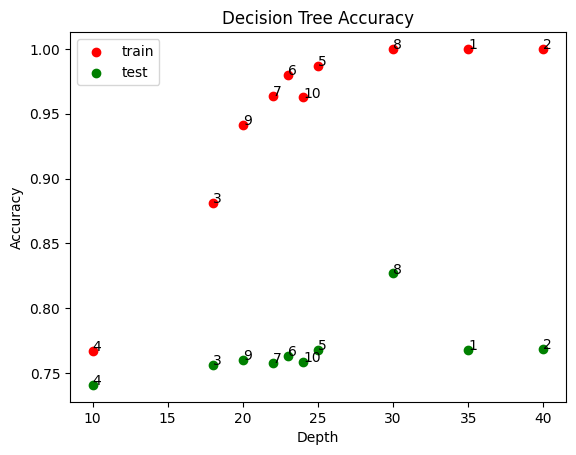

In [ ]:
Plotting(Accuracies, Depths)

## Pruning

In [ ]:
criterion = 'gini'
tree_model = DecisionTree(criterion, max_depth = 10)
tree_model = Fit(tree_model, X_train, y_train)
path = tree_model.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 4.50334313e-06, 4.57250249e-06, 4.89398421e-06,
        4.93453762e-06, 8.17547150e-06, 8.22375184e-06, 9.88750934e-06,
        1.01932792e-05, 1.02922234e-05, 1.04107276e-05, 1.13349754e-05,
        1.13673595e-05, 1.29230386e-05, 1.37062531e-05, 1.37535160e-05,
        1.39554960e-05, 1.48027533e-05, 1.64475037e-05, 1.70401846e-05,
        1.71328163e-05, 1.82654917e-05, 1.87971471e-05, 1.89630042e-05,
        1.98182538e-05, 2.05593796e-05, 2.06648123e-05, 2.09026879e-05,
        2.12823468e-05, 2.15312775e-05, 2.18811170e-05, 2.19300049e-05,
        2.22041300e-05, 2.22041300e-05, 2.25565765e-05, 2.31762163e-05,
        2.35985922e-05, 2.37749405e-05, 2.38434912e-05, 2.40044648e-05,
        2.43768260e-05, 2.46712555e-05, 2.46712555e-05, 2.46712555e-05,
        2.46712555e-05, 2.46712555e-05, 2.46712555e-05, 2.46712555e-05,
        2.46712555e-05, 2.46712555e-05, 2.46712555e-05, 2.50628628e-05,
        2.51133186e-05, 2.51518644e-05, 2.54936307

In [ ]:
ccp_alpha, impurity = path.ccp_alphas, path.impurities

Text(0, 0.5, 'impurity of leaves')

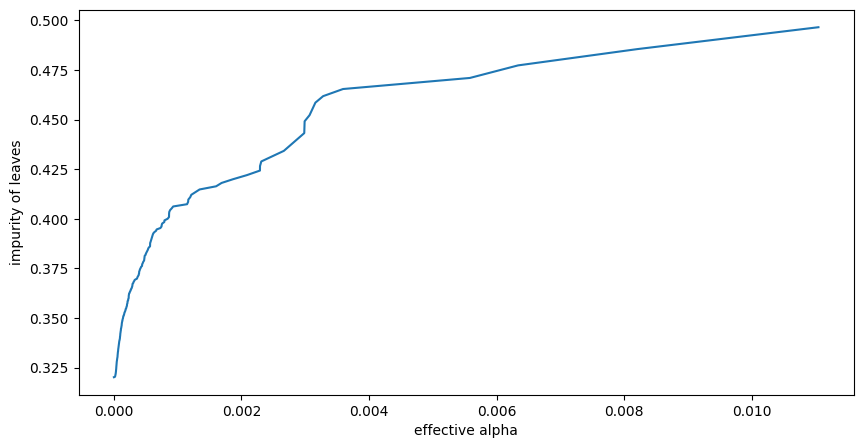

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(ccp_alpha, impurity)
plt.xlabel("effective alpha")
plt.ylabel("impurity of leaves")

In [ ]:
models = []
with tf.device('/device:GPU:0'):
  for ccp_alpha_i in ccp_alpha:
    model = DecisionTreeClassifier(random_state = 1, ccp_alpha = ccp_alpha_i)
    model.fit(X_train, y_train)
    models.append(model)

Text(0, 0.5, 'Accuracy')

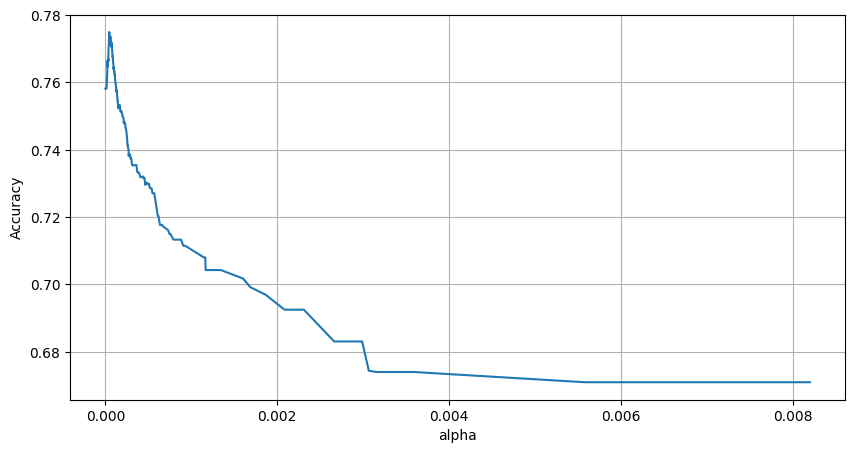

In [ ]:
accuracy_scores = [accuracy_score(y_test,model.predict(X_test)) for model in
                   models]
plt.figure(figsize = (10,5))
plt.grid()
plt.plot(ccp_alpha[:-1],accuracy_scores[:-1])
plt.xlabel("alpha")
plt.ylabel("Accuracy")